In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns ; sns.set()

# Prédire un genre musical

Voici le jeu de données `dataset.csv` qui contient la description d'oeuvres de musique du Bengladesh. Chaque titre est associé à un genre qu'il s'agira de prédire (colonne `label`). 

**Question** Observer les statistiques descriptives, commenter en indiquant 

1. Si vous devez garder tous les champs et pourquoi.
2. Si ces champs doivent être renormalisés ou pas et pourquoi.


_Chargement de données_

In [2]:
data = pd.read_csv("dataset.csv")

_Statistiques sur les données_

In [3]:
data.describe(include="all")

,file_name,zero_crossing,spectral_centroid,spectral_rolloff,spectral_bandwidth,chroma_frequency,rmse,delta,melspectogram,tempo,...,mfcc11,mfcc12,mfcc13,mfcc14,mfcc15,mfcc16,mfcc17,mfcc18,mfcc19,label
count,1742,1742.000000,1742.000000,1742.000000,1742.000000,1742.000000,1742.000000,1.742000e+03,1742.000000,1742.000000,...,1742.000000,1742.000000,1742.000000,1742.000000,1742.000000,1742.000000,1742.000000,1742.000000,1742.000000,1742
unique,1742,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6
top,tumi je amare chao ( 160kbps ).mp3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,nazrul
freq,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,312
mean,NaN,215007.465557,2015.700468,4100.426211,2043.560009,0.305385,0.171471,-1.743660e-09,8.522913,123.112315,...,0.117813,-5.085212,-1.104625,-4.488481,-0.222948,-4.636100,0.331630,-4.160293,-0.704487,NaN
std,NaN,89920.930842,721.696480,1597.279461,666.244323,0.072464,0.075168,1.393930e-07,7.374733,21.849677,...,5.985646,5.253280,5.643891,4.682304,4.659930,4.515759,4.447436,4.531011,4.433841,NaN
min,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-1.676001e-06,0.000000,73.828125,...,-25.692529,-24.642862,-26.359570,-23.886369,-20.935224,-21.520218,-17.205040,-24.743798,-16.665104,NaN
25%,NaN,152359.000000,1533.507050,2962.049702,1699.097722,0.249591,0.118410,-6.728298e-08,3.576854,107.666016,...,-3.046898,-8.325668,-3.995158,-7.407150,-2.824771,-7.600435,-2.115535,-6.914308,-3.256649,NaN
50%,NaN,196971.500000,2033.964745,4226.889780,2223.573271,0.294676,0.160642,1.617425e-10,6.477533,123.046875,...,0.643217,-4.750612,-0.513353,-4.537535,0.162360,-4.908912,0.495084,-4.428667,-0.535849,NaN
75%,NaN,257056.250000,2495.077302,5258.493696,2532.093962,0.351839,0.214249,6.924068e-08,11.528968,135.999178,...,3.916396,-1.735095,2.440787,-1.597814,2.756847,-2.071220,3.124587,-1.830402,2.015320,NaN


In [4]:
data.isna().sum()

file_name             0
zero_crossing         0
spectral_centroid     0
spectral_rolloff      0
spectral_bandwidth    0
chroma_frequency      0
rmse                  0
delta                 0
melspectogram         0
tempo                 0
mfcc0                 0
mfcc1                 0
mfcc2                 0
mfcc3                 0
mfcc4                 0
mfcc5                 0
mfcc6                 0
mfcc7                 0
mfcc8                 0
mfcc9                 0
mfcc10                0
mfcc11                0
mfcc12                0
mfcc13                0
mfcc14                0
mfcc15                0
mfcc16                0
mfcc17                0
mfcc18                0
mfcc19                0
label                 0
dtype: int64

_Champs à garder :_ les champs ne comportent aucune valeur manquantes, on pourrait donc a priori tous les garder, car on pourrait toujours utiliser chacune des lignes du dataset.

En revanche, le champ `file_name` est différent pour chaque ligne, donc on l'enlève.

_Normalisation :_ les échelles des variables sont très différentes (moyenne de `215007` pour `zero_crossing` et de `-1.743660e-09` pour `delta`), on va donc devoir normaliser.

In [5]:
# on supprime le champ `file_name`
data = data.drop(["file_name"], axis=1)
data

,zero_crossing,spectral_centroid,spectral_rolloff,spectral_bandwidth,chroma_frequency,rmse,delta,melspectogram,tempo,mfcc0,...,mfcc11,mfcc12,mfcc13,mfcc14,mfcc15,mfcc16,mfcc17,mfcc18,mfcc19,label
0,125424,1770.889394,3893.575094,2414.810615,0.315795,0.222552,-7.661680e-08,12.977708,172.265625,-107.906257,...,3.164991,-3.867179,5.325016,1.176338,-0.788755,-6.343288,2.488148,0.047027,7.211918,adhunik
1,308658,2549.349989,4986.658880,2193.617981,0.310113,0.156930,8.893313e-08,5.118271,143.554688,-68.452095,...,8.358729,-12.691169,11.393858,-6.176215,9.947330,-6.987708,7.935905,-9.452455,1.582699,adhunik
2,158328,2013.718396,4573.595848,2515.994413,0.301663,0.093736,1.340824e-07,2.497263,103.359375,-193.043916,...,-3.361615,-6.730814,0.184162,-4.139533,4.409801,3.190835,4.862090,-6.406590,-0.705287,adhunik
3,136711,1827.495303,4215.075766,2284.762196,0.349875,0.039457,-1.908483e-08,0.421975,135.999178,-264.475953,...,8.563364,-7.990767,3.611352,-4.211268,5.490051,-7.556331,1.124302,-4.306443,0.957663,adhunik
4,238711,1715.832235,3303.949296,1587.488472,0.300132,0.142870,-5.355904e-08,4.311442,92.285156,-122.895783,...,-1.230101,-5.323076,-3.194775,-7.124155,-4.431173,-4.797250,-4.686700,-4.393025,-1.749295,adhunik
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1737,78516,800.797115,1436.990088,1090.389766,0.227325,0.108344,2.078194e-08,3.020211,117.453835,-260.840390,...,-2.615630,2.119485,-12.506942,-1.148996,0.090582,-8.694072,-6.597594,2.925687,-6.154576,rabindra
1738,176887,1734.844686,3464.133429,1954.831684,0.271189,0.124934,5.785562e-08,4.098559,129.199219,-143.373420,...,1.693247,-4.076407,-2.017894,-7.419591,-0.488603,-8.690254,-7.090489,-6.530357,-5.593533,rabindra
1739,133326,1380.139172,2745.410904,1775.717428,0.263462,0.111411,4.204189e-08,3.147722,143.554688,-175.240506,...,2.487961,-3.434017,-6.099467,-6.008315,-7.483330,-2.908477,0.783345,-3.394053,-3.157621,rabindra
1740,179932,1961.435018,4141.554401,2324.507425,0.261823,0.168673,3.245319e-07,7.674615,143.554688,-124.356049,...,1.192605,-13.142963,0.281834,-5.981567,-1.066383,0.677886,0.803132,-3.304548,4.309490,rabindra


**Question** 

- À quel type précisément de problème faites vous face ?
- À la vue de quelques statistiques élémentaires, quel serait le taux de réussite de la règle la plus idiote ?
- Vérifier cela avec sklearn.

In [6]:
data["label"].value_counts()

nazrul        312
rabindra      297
band          295
hiphop        295
adhunik       283
palligeeti    260
Name: label, dtype: int64

_Type de problème :_ C'est un problème de classification avec plusieurs classes (6 classes). Il y a environ autant d'exemples pour chacun des classes, le problème est donc équilibré.

_Taux de réussite :_ Regardons plus précisément la proportion de chacune des classes :

In [7]:
data["label"].value_counts() / len(data["label"])

nazrul        0.179104
rabindra      0.170494
band          0.169346
hiphop        0.169346
adhunik       0.162457
palligeeti    0.149254
Name: label, dtype: float64

A priori, en prédisant toujours `nazrul`, on obtient une précision de 18%. Et comme les classes sont presque équilibrées, on aura une précision de 1/6 environ pour une prédiction aléatoire 

_Vérifions avec sklearn :_

In [8]:
from sklearn.dummy import DummyClassifier

In [9]:
from sklearn.model_selection import train_test_split

X = data.loc[:, data.columns != "label"]
y = data["label"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [10]:
dummy_clf = DummyClassifier(strategy="most_frequent")
print(dummy_clf.fit(X_train, y_train).score(X_test, y_test))
dummy_clf = DummyClassifier(strategy="uniform")
print(dummy_clf.fit(X_train, y_train).score(X_test, y_test))

0.1791304347826087
0.18956521739130436


On a en effet 18% de bonnes prédictions avec la règle majoritaire et près de 1/6 pour la règle uniforme.

**Question** 

1. Préparer les variables `X` et `y` contenant les descriptions des données et les labels.
2. Appliquer des transformations si nécessaire
3. Recréer un dataframe contenant les description des données `X` (nécessaire pour faciliter le tracé ensuite des diagrammes).


_Préparation des données :_ on sépare les données en deux variables `X` et `y`.

On normalise également les données, et on crée un nouveau `DataFrame` avec ces données.

In [11]:
from sklearn.preprocessing import scale

X = scale(data.loc[:, data.columns != "label"])
y = data["label"]

df = pd.DataFrame(X)
df.columns = data.columns[data.columns != "label"]
df["label"] = y

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33)

**Question** Avec `distplot` affichez l'estimation de densité de `chroma_frequency`

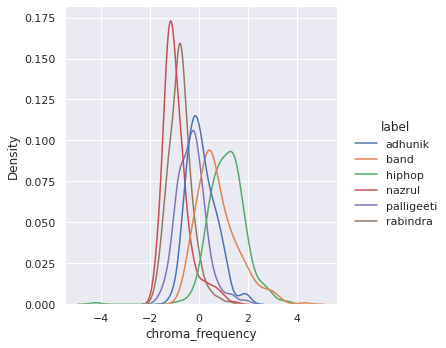

Regardons comment ça marche, `distplot`.

On a besoin des arguments `kde=True` et `hist=False` car on veut afficher une courbe et non un histogramme.

In [12]:
help(sns.distplot)

Help on function distplot in module seaborn.distributions:

distplot(a=None, bins=None, hist=True, kde=True, rug=False, fit=None, hist_kws=None, kde_kws=None, rug_kws=None, fit_kws=None, color=None, vertical=False, norm_hist=False, axlabel=None, label=None, ax=None, x=None)
    DEPRECATED: Flexibly plot a univariate distribution of observations.
    
    .. warning::
       This function is deprecated and will be removed in a future version.
       Please adapt your code to use one of two new functions:
    
       - :func:`displot`, a figure-level function with a similar flexibility
         over the kind of plot to draw
       - :func:`histplot`, an axes-level function for plotting histograms,
         including with kernel density smoothing
    
    This function combines the matplotlib ``hist`` function (with automatic
    calculation of a good default bin size) with the seaborn :func:`kdeplot`
    and :func:`rugplot` functions. It can also fit ``scipy.stats``
    distributions and

/home/tommasi/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/home/tommasi/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/home/tommasi/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with si

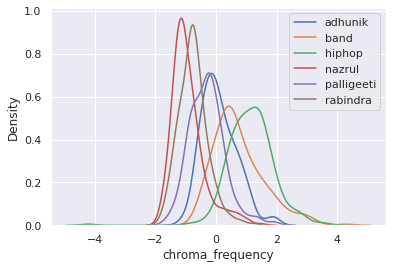

In [13]:
for label in y.unique():
    sns.distplot(df["chroma_frequency"][y==label], hist=False, label=label)
plt.legend()
plt.show()

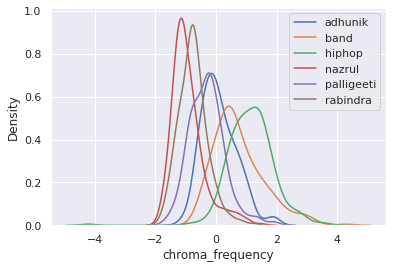

In [14]:
df.groupby('label')['chroma_frequency'].apply(
            lambda x: sns.kdeplot(x, label = x.name));
plt.legend()
plt.xlabel("chroma_frequency")
plt.show()

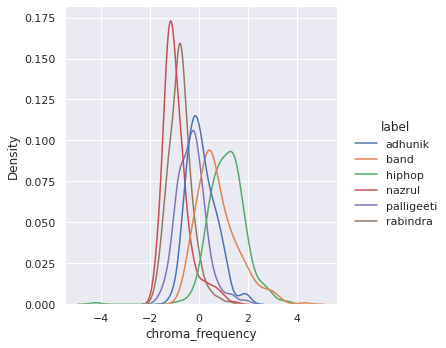

In [15]:
sns.displot(df, x='chroma_frequency', hue="label", kind="kde")

**Question bonus** 

- Si vous avez le temps à la fin, tracez ceci

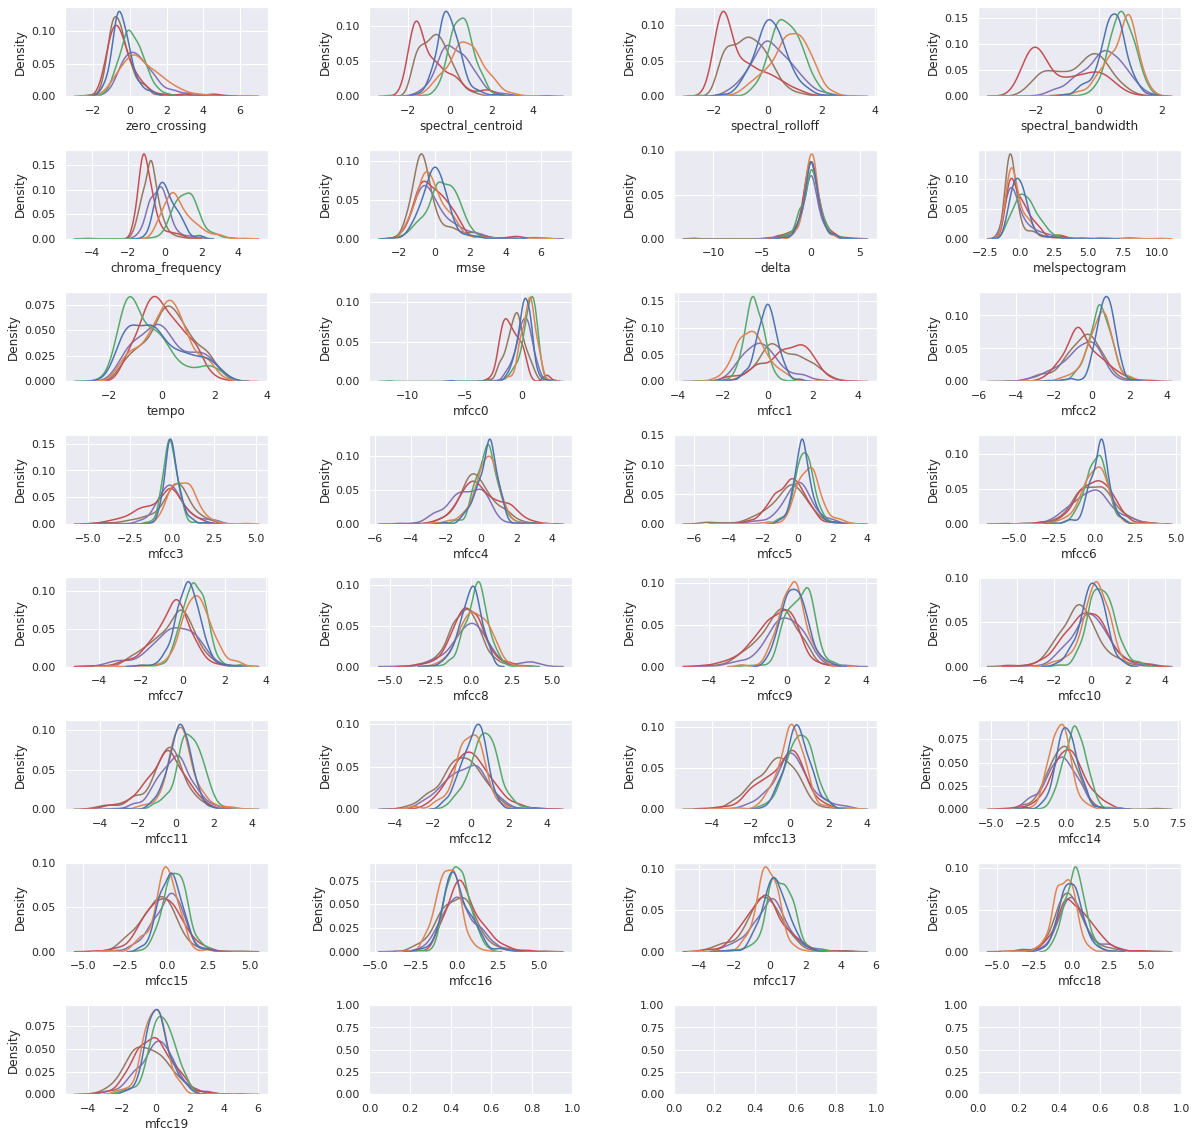

_Question BONUS :_ Pour cette question, on a besoin d'utiliser la fonction `kdeplot` et non `displot`, mais c'est dû à un changement récent dans seaborn. On crée une grille et on affiche le graphe des distributions dans chacune des cases.

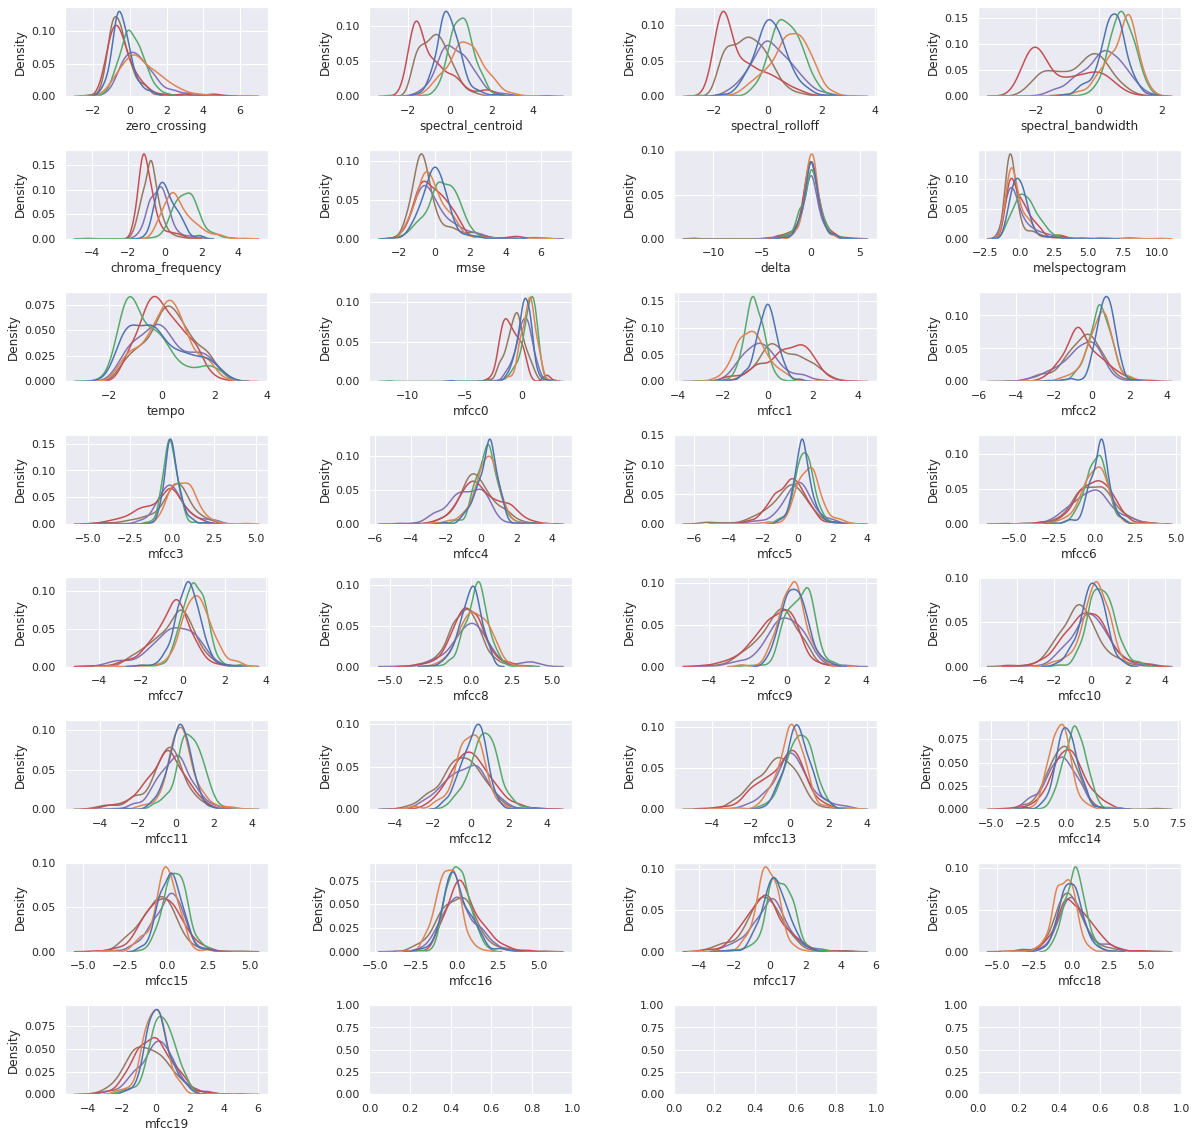

In [16]:
cols = df.columns[:-1]
fig, ax = plt.subplots(8, 4, figsize=(20,20))

for i, col in enumerate(cols):
    sns.kdeplot(data=df, x=col, hue="label", ax = ax.ravel()[i], legend=False)

plt.subplots_adjust(hspace=0.6, wspace=0.5)

**Question** Pensez-vous qu'on puisse apprendre un modèle qui fasse mieux que la règle majoritaire ? Pourquoi ?

On a de fortes chances de réussir à faire mieux avec un autre modèle, car la distribution des valeurs de `chroma_frenquency` (et d'autres variables) sont différentes, donc on devrait réussir à capturer cela dans un modèle.

**Question** Afficher les correlations entre champs. Que constatez-vous ?

On calcule et affiche la matrice de corrélations.

<AxesSubplot:>

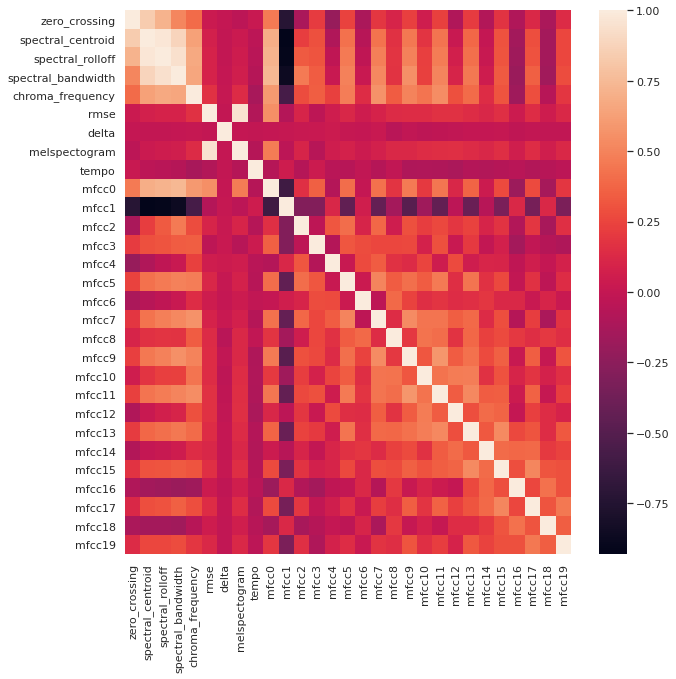

In [17]:
fig, ax = plt.subplots(figsize=(10, 10))
sns.heatmap(df.corr(method="pearson"), ax=ax)

On remarque que les variables `spectral_centroid`, `spectral_rolloff`, `spectral_bandwidth` sont très corrélées.

rmse et melspetrogram sont également très corrélées.

**Question** 

1. Préparer vos données pour être en mesure d'apprendre des classifieurs et évaluer les erreurs en généralisation
2. Entraînez les méthodes suivantes
   - Arbres de décision DecisionTreeClassifier
   - NaiveBayes Gaussien GaussianNB
   - SVC
   - LogisticRegression
3. Vérifiez si vous pouvez trouver de bon hyper-paramètres pour certaines méthodes
4. Concluez

_Préparation des données :_ On enlève les variables qui sont trop corrélées, puis on normalise les données.

In [18]:
df_removed = data.drop(["spectral_rolloff", "spectral_bandwidth", "melspectogram"], axis=1)

X = df_removed.loc[:, df_removed.columns != "label"]
y = df_removed["label"]

X = scale(X)

Pour évaluer l'erreur de généralisation, on peut faire de la cross-validation.

Pour cela on peut utiliser la méthode `cross_validate` de sklearn, qui renvoie le score qu'un classifieur obtient sur différentes découpes des données en `train` et en `test`.

Remarque : une façon plus simple mais moins efficace d'évaluer les erreur de généralisation est d'utiliser la fonction `train_test_split` pour découper les données en données de `train` et de `test`.

In [19]:
from sklearn.model_selection import cross_validate

# une fonction pour évaluer un classifieur
def evaluate_method(clf, X, y):
    scores = cross_val_score(clf, X, y, cv=5)

In [20]:
# on importe les classifieurs
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

Pour des raisons purement cosmétiques, on définit une fonction qui prend une liste de classifieurs, les entraîne et donne les résultats.

In [21]:
def evaluate_classifiers(clfs, names, X, y):
    scores = {}
    best = None
    best_score = 0
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)
    
    print("CROSS VALIDATION OVER 5 FOLDS")
    print("==========================")

    for clf, name in zip(clfs, names):
        scores[clf] = cross_validate(clf, X_train, y_train, 
                                     return_train_score=True, cv=5,
                                     return_estimator=True)
        
        train_scores = scores[clf]["train_score"]
        valid_scores = scores[clf]["test_score"]
        test_scores = [est_clf.score(X_test, y_test) for est_clf in scores[clf]["estimator"]]

        print(name)
        print("\tTraining time mean: %.2f" % np.mean(scores[clf]["fit_time"]))
        print("\tTrain mean: %.2f" % np.mean(train_scores))
        print("\tValidation mean: %.2f" % np.mean(valid_scores))     
        print("\tTest: %.2f" % clf.fit(X_train, y_train).score(X_test, y_test))
        print()
        
        if(np.mean(valid_scores) > best_score):
            best_score = np.mean(valid_scores)
            best = clf
            best_name = name
            
    print("Best Classifier (according to validation): ", name, "with mean score %.2f" % best_score)

In [22]:
clfs = [DummyClassifier(strategy="stratified"),
        GaussianNB(), 
        SVC(), 
        LogisticRegression(max_iter=10000), 
        DecisionTreeClassifier(criterion="entropy"),
        RandomForestClassifier()]

names = ["Dummy", "GaussianNB", "SVC", "LogisticRegression", "DecisionTree", "RandomForest"]

evaluate_classifiers(clfs, names, X, y)

CROSS VALIDATION OVER 5 FOLDS
Dummy
	Training time mean: 0.00
	Train mean: 0.17
	Validation mean: 0.14
	Test: 0.17

GaussianNB
	Training time mean: 0.00
	Train mean: 0.60
	Validation mean: 0.57
	Test: 0.56

SVC
	Training time mean: 0.04
	Train mean: 0.84
	Validation mean: 0.70
	Test: 0.70

LogisticRegression
	Training time mean: 0.07
	Train mean: 0.71
	Validation mean: 0.65
	Test: 0.68

DecisionTree
	Training time mean: 0.04
	Train mean: 1.00
	Validation mean: 0.57
	Test: 0.57

RandomForest
	Training time mean: 0.39
	Train mean: 1.00
	Validation mean: 0.68
	Test: 0.69

Best Classifier (according to validation):  RandomForest with mean score 0.70


__Résultats :__ pour l'instant, on n'a pas cherché à tuner les hyperparamètres. On remarque quand même déjà que :

* tous les classifieurs sont meilleurs que le classifieur idiot `DummyClassifier`.

* `LogisticRegression`, `SVC` et `RandomForest` semblent obtenir les meilleurs résultats en test.

* `DecisionTree` et `RandomForest` ont une tendance à faire de l'overfitting : leur prédiction en train est parfaite alors qu'elle est bien moins bonne en test.

* `GaussianNB` et `DecisionTree` sont moins bons que les autres.

On va essayer d'obtenir de meilleurs hyperparamètres. Pour cela, on peut utiliser `GridSearch`, qui entraîne un classifieur avec différents paramètres, pour essayer de trouver le meilleur.

__Remarque Importante :__ si on coupe simplement en train/test et on compare les résulats sur le test, alors on commet une erreur de méthodologie : en effet, si on compare de nombreux classifieurs (par exemple en changeant de nombreux hyperparamètres), on risque fort d'overfitter : ie trouver un classifieur qui par chance marche très bien sur le test. Il faut donc un échantillon de validation pour comparer les classifieurs et le calcul de l'erreur sur le test ne peut servir à comparer mais juste à calculer une estimation de l'erreur réelle. Quand les échantillons sont trop petits pour couper en 3 parties, on utilise le mécanisme de la validation croisée. 

In [23]:
from sklearn.model_selection import GridSearchCV

# hyperparam : profondeur et criterion
clfs_grid = [GridSearchCV(estimator=DummyClassifier(random_state=42),
                          param_grid={'strategy': ('stratified', 'most_frequent')}),
             
             GridSearchCV(estimator=DecisionTreeClassifier(random_state=42), \
                          param_grid={'max_depth': np.arange(2,11), 
                                      'criterion':('gini', 'entropy')}),
             
             GridSearchCV(estimator=RandomForestClassifier(random_state=42), \
                          param_grid={'max_depth': np.concatenate((np.arange(2, 10), [None])), 
                                      'n_estimators': [10, 50, 100]}),
             
             GridSearchCV(estimator=LogisticRegression(random_state=42,max_iter=10000), \
                          param_grid={'C': np.logspace(-2, 3, 6)}),
             
             GridSearchCV(estimator=SVC(), \
                          param_grid={'C': np.logspace(-2, 3, 6)}),
             
             GaussianNB()]

names = ["Dummy", "GaussianNB", "SVC", "LogisticRegression", "DecisionTree", "RandomForest"]

evaluate_classifiers(clfs_grid, names, X, y)

CROSS VALIDATION OVER 5 FOLDS
Dummy
	Training time mean: 0.04
	Train mean: 0.18
	Validation mean: 0.18
	Test: 0.17

GaussianNB
	Training time mean: 1.69
	Train mean: 0.80
	Validation mean: 0.57
	Test: 0.54

SVC
	Training time mean: 20.39
	Train mean: 1.00
	Validation mean: 0.70
	Test: 0.68

LogisticRegression
	Training time mean: 2.19
	Train mean: 0.72
	Validation mean: 0.65
	Test: 0.66

DecisionTree
	Training time mean: 1.52
	Train mean: 0.90
	Validation mean: 0.69
	Test: 0.70

RandomForest
	Training time mean: 0.00
	Train mean: 0.60
	Validation mean: 0.57
	Test: 0.56

Best Classifier (according to validation):  RandomForest with mean score 0.70


Cela demande beaucoup plus de calculs, et les temps d'entraînement sont donc plus longs. De plus, on n'obtient pas réellement de gain de performances en test.

Il faudrait peut-être élargir l'ensemble des hyperparamètres que l'on teste.

_Remarque bonus :_ on a vu tout à l'heure que `chroma_frequency` contenait déjà pas mal d'information... et si on réduisait `X` à `chroma_frequency` ?

In [24]:
X_chroma = df.loc[:, "chroma_frequency"][:, None]

evaluate_classifiers(clfs_grid, names, X_chroma, y)

CROSS VALIDATION OVER 5 FOLDS


/home/tommasi/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  """Entry point for launching an IPython kernel.


Dummy
	Training time mean: 0.03
	Train mean: 0.18
	Validation mean: 0.18
	Test: 0.17

GaussianNB
	Training time mean: 0.34
	Train mean: 0.45
	Validation mean: 0.39
	Test: 0.37

SVC
	Training time mean: 14.11
	Train mean: 0.45
	Validation mean: 0.42
	Test: 0.41

LogisticRegression
	Training time mean: 0.46
	Train mean: 0.40
	Validation mean: 0.40
	Test: 0.43

DecisionTree
	Training time mean: 1.94
	Train mean: 0.44
	Validation mean: 0.43
	Test: 0.43

RandomForest
	Training time mean: 0.00
	Train mean: 0.41
	Validation mean: 0.41
	Test: 0.41

Best Classifier (according to validation):  RandomForest with mean score 0.43


C'est pas si mal, mais on y arrive quand même vraiment moins bien, autant garder les autres variables !